In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import openpiv

In [24]:
im1 = '../Data/Test von Karman/PIVlab_Karman_01.bmp'
im2 = '../Data/Test von Karman/PIVlab_Karman_02.bmp'

In [25]:
from openpiv.tools import imread

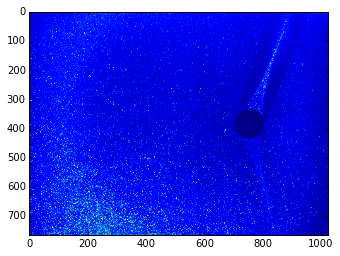

In [26]:
plt.imshow(imread(im1))

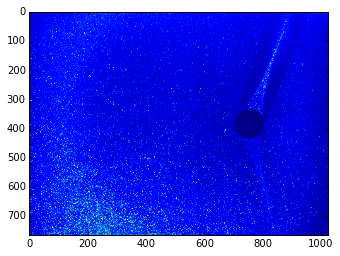

In [27]:
plt.imshow(imread(im1))

In [28]:
# masking
imMask = '../Data/Test von Karman/PIVlab_Karman_mask.png'
imask = imread(imMask)

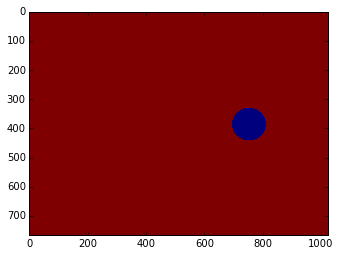

In [29]:
plt.imshow(imask)

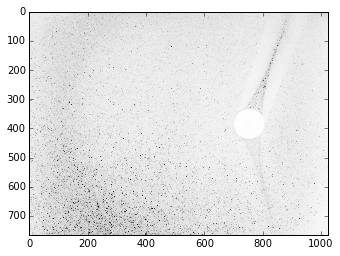

None

<function __main__.view_image>

In [30]:
# visualize the shift of two images
from ipywidgets import interact

i1 = imread(im1)
i2 = imread(im2)
images = [i1,i2]
def view_image(i):
    plt.imshow(images[i], cmap=plt.cm.gray_r)
    plt.show()
    
interact(view_image, i=(0,1))

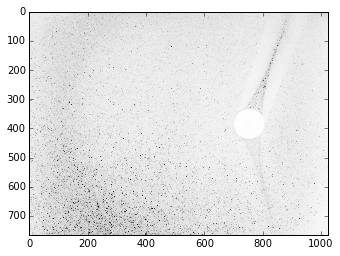

None

<function __main__.view_image>

In [31]:
# dynamic masking
i1a = openpiv.preprocess.dynamic_masking(i1)
i2a = openpiv.preprocess.dynamic_masking(i2)
images = [i1a,i2a]
interact(view_image, i=(0,1))

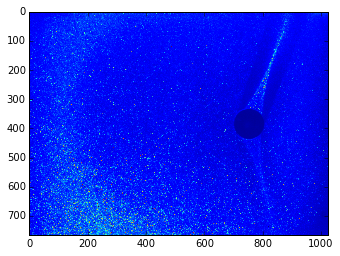

In [32]:
plt.imshow(i1-imask)

In [41]:
# [pivPar, pivData] = pivParams(pivData,pivPar,'defaults');
# [pivData] = pivAnalyzeImagePair(im1,im2,pivData,pivPar);
params = {'window_size':24, 'overlap':12, 'dt':0.02, 'search_area_size':64, 'sig2noise_method':'peak2peak'}
# first let's create default parameters
openpiv.process.extended_search_area_piv(i1.astype(np.int32),i2.astype(np.int32),**params)

(array([[  -73.73657227,   -66.97502136,   -68.61343384, ...,
           -65.16532898,  -537.9276123 ,  -986.0802002 ],
        [  -85.83488464,  1157.38183594,   -75.91629028, ...,
            13.08555603,  -749.49188232,  -996.19140625],
        [  -96.33712769,   -86.25068665,   -81.65893555, ...,
           -86.35406494,  1185.2520752 ,   665.58685303],
        ..., 
        [  -92.03720093,   -94.06776428,   -86.72294617, ...,
          -119.8551178 ,  1016.12817383,   789.04803467],
        [  -88.80271912,   -89.21470642,   -87.07084656, ...,
          -262.69647217,  -942.972229  ,   488.18130493],
        [  -84.01947021,   -85.49537659,   -86.54174805, ...,
         -1254.02905273, -1648.40454102,   468.94647217]]),
 array([[ -3.38172913e+00,  -5.23185730e+00,  -5.15022278e+00, ...,
          -1.58802032e+01,  -1.75884247e+01,  -1.75716400e+01],
        [  9.04846191e-01,   1.31560840e+03,   5.46569824e+00, ...,
           5.81600952e+02,   5.82844177e+02,   5.84068298e+02],


In [ ]:
window_size = 32 # pixels
overlap = 16 # pixels, i.e. 50%
dt = 1./15 # 15 Hz laser and CCD recording
# process PIV
u, v, sig2noise = \
openpiv.process.extended_search_area_piv( \
                                         img_a, img_b, \
                                         window_size=window_size,\
                                         overlap = overlap, \
                                         dt = dt, \
                                         search_area_size=2*window_size, \
                                         sig2noise_method='peak2peak' )

# get the central points of the interrogation windows
x, y = openpiv.process.get_coordinates( image_size = img_a.shape, \
                                       window_size = window_size, \
                                       overlap  = overlap )